### Students
Kemal Cagin Sertkaya - 2019400264

Leyla Yayladere - 2018400216

Mustafa Atay - 2020400333

## Q1 - Support Vector Machine

In [3]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
from sklearn import svm
from sklearn.decomposition import PCA
from skimage import transform

train_path = 'linearRegression_data/3dshapes_train'
test_path = 'linearRegression_data/3dshapes_test'
N_train = 10000
N_test = 1000


### Histogram of Gradients Parameter Selection
After searching on web, we decided to use below values for the HOG features (orientations, peixels_per_cell, cells_per_block etc.). The paper of Navneet Dalal and Bill Triggs, https://hal.inria.fr/inria-00548512/document, was referenced for the parameter selection.


(10000, 1568)
(10000, 64, 64)


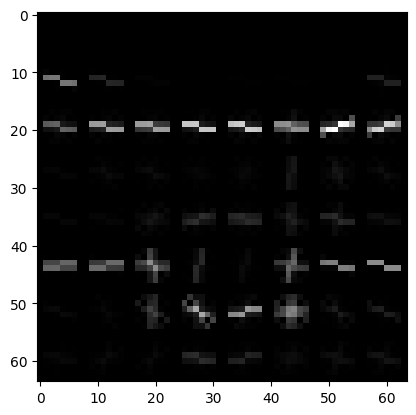

In [2]:
hog_train_images = []
hog_train_features = []

for i in range(N_train):
    img = Image.open('{}/{}.jpg'.format(train_path, i))
    # Since we don't need the color information, we convert the image to grayscale.
    img = ImageOps.grayscale(img)
    # hog function returns two values: feature descriptor (fd) and hog image (hog_image). Feature descriptors will be used for training later.
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(
        2, 2), block_norm='L2-Hys', transform_sqrt=True, feature_vector=True, visualize=True)
    hog_train_images.append(hog_image)
    hog_train_features.append(fd)

hog_train_features = np.array(hog_train_features)
hog_train_images = np.array(hog_train_images)

print(hog_train_features.shape)
print(hog_train_images.shape)

# Plot an example HoG image
plt.imshow(hog_train_images[1000], cmap=plt.cm.gray)
plt.show()

In [3]:
# Apply the same procedure for test images.

hog_test_images = []
hog_test_features = []

for i in range(N_test):
    img = Image.open('{}/{}.jpg'.format(test_path, i))
    img = ImageOps.grayscale(img)
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(
        2, 2), block_norm='L2-Hys', transform_sqrt=True, feature_vector=True, visualize=True)
    hog_test_images.append(hog_image)
    hog_test_features.append(fd)
    
hog_test_features = np.array(hog_test_features)
hog_test_images = np.array(hog_test_images)

print(hog_test_features.shape)
print(hog_test_images.shape)

(1000, 1568)
(1000, 64, 64)


In [5]:
y_train = np.load(
    'linearRegression_data/orientations_train.npy')
y_test = np.load(
    'linearRegression_data/orientations_test.npy')

print(np.unique(y_train))

[-30.         -25.71428571 -21.42857143 -17.14285714 -12.85714286
  -8.57142857  -4.28571429   0.           4.28571429   8.57142857
  12.85714286  17.14285714  21.42857143  25.71428571  30.        ]


In [6]:
# Since these y-values contunius, we need to convert them to discrete values to make them suitable for classification problem.
y_train = np.round(y_train)
y_test = np.round(y_test)

print(np.unique(y_train))
print(np.unique(y_test))

[-30. -26. -21. -17. -13.  -9.  -4.   0.   4.   9.  13.  17.  21.  26.
  30.]
[-30. -26. -21. -17. -13.  -9.  -4.   0.   4.   9.  13.  17.  21.  26.
  30.]


### Q1.a(i) - binary classification problem

In [8]:
# Select two classes for binary classification
class1 = y_train[0]
class2 = y_train[1]

X_train_binary = hog_train_features[np.logical_or(y_train == class1, y_train == class2)]
y_train_binary = y_train[np.logical_or(y_train == class1, y_train == class2)]

X_test_binary = hog_test_features[np.logical_or(y_test == class1, y_test == class2)]
y_test_binary = y_test[np.logical_or(y_test == class1, y_test == class2)]

print(X_train_binary.shape)
print(y_train_binary.shape)
print(X_test_binary.shape)
print(y_test_binary.shape)

print(np.unique(y_train_binary))
print(np.unique(y_test_binary))

(1338, 1568)
(1338,)
(135, 1568)
(135,)
[-13.  13.]
[-13.  13.]


In [9]:
def calculateError(actual, predicted):
    # Calculate the number of misclassified examples.
    errors = np.count_nonzero(actual - predicted)
    accuracy = 1 - (errors / actual.shape[0])
    return errors, accuracy

In [10]:
# Apply SVM with linear kernel for the selected two classes.
binary_clf = svm.SVC(kernel='linear', C=1)
binary_clf.fit(X_train_binary, y_train_binary)

# Predict the test examples.
y_test_binary_predicted = binary_clf.predict(X_test_binary)
errors, accuracy = calculateError(y_test_binary, y_test_binary_predicted)

print('2 class problem with linear kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

2 class problem with linear kernel: accuracy: 1.0, error count: 0


### Q1.a(ii) - 15 class classification problem

In [11]:
# For the 15-class problem, fetch all the HoG features for training and test examples.
X_train_data = hog_train_features
y_train_actual = y_train
X_test_data = hog_test_features
y_test_actual = y_test

print(X_train_data.shape)
print(y_train_actual.shape)
print(X_test_data.shape)
print(y_test_actual.shape)

print(np.unique(y_train_actual))
print(np.unique(y_test_actual))

# Apply SVM with linear kernel for the 15-class problem.
multi_clf = svm.SVC(kernel='linear', C=1)
multi_clf.fit(X_train_data, y_train_actual)

# Predict the test examples.
y_test_predicted = multi_clf.predict(X_test_data)
errors, accuracy = calculateError(y_test_actual, y_test_predicted)

print('15 class problem with linear kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

(10000, 1568)
(10000,)
(1000, 1568)
(1000,)
[-30. -26. -21. -17. -13.  -9.  -4.   0.   4.   9.  13.  17.  21.  26.
  30.]
[-30. -26. -21. -17. -13.  -9.  -4.   0.   4.   9.  13.  17.  21.  26.
  30.]
15 class problem with linear kernel: accuracy: 1.0, error count: 0


### Q1.a(iii) - Compare (i) and (ii)

In the 2 class classification problem, the SVM only needs to differentiate between two classes, whereas in the 15 class classification problem, it needs to differentiate between 15 different classes. This makes the 15 class classification problem more complex and potentially more difficult. However, the test accuracies for both problems are the same at 1. This makes it difficult to compare their classification performance, but we can observe that the computation time for the binary classification problem is significantly less.

### Q1.b

In [12]:
# Same steps are repeated for binary classification problem for hard-margin linear SVM, soft-margin linear SVM, hard-margin non-linear SVM with various kernel functions, and soft-margin non-linear SVM with various kernel functions.

# Hard Margin Linear SVM
binary_clf = svm.SVC(kernel='linear', C=1000000)
binary_clf.fit(X_train_binary, y_train_binary)
y_test_binary_predicted = binary_clf.predict(X_test_binary)
errors, accuracy = calculateError(y_test_binary, y_test_binary_predicted)
print('2 class problem with hard margin linear kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

# Soft Margin Linear SVM
binary_clf = svm.SVC(kernel='linear', C=1)
binary_clf.fit(X_train_binary, y_train_binary)
y_test_binary_predicted = binary_clf.predict(X_test_binary)
errors, accuracy = calculateError(y_test_binary, y_test_binary_predicted)
print('2 class problem with soft margin linear kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

# Hard Margin Non-Linear SVM with Polynomial Kernel
binary_clf = svm.SVC(kernel='poly', C=1000000)
binary_clf.fit(X_train_binary, y_train_binary)
y_test_binary_predicted = binary_clf.predict(X_test_binary)
errors, accuracy = calculateError(y_test_binary, y_test_binary_predicted)
print('2 class problem with hard margin polynomial kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

# Soft Margin Non-Linear SVM with Polynomial Kernel
binary_clf = svm.SVC(kernel='poly', C=1)
binary_clf.fit(X_train_binary, y_train_binary)
y_test_binary_predicted = binary_clf.predict(X_test_binary)
errors, accuracy = calculateError(y_test_binary, y_test_binary_predicted)
print('2 class problem with soft margin polynomial kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

# Hard Margin Non-Linear SVM with RBF Kernel
binary_clf = svm.SVC(kernel='rbf', C=1000000)
binary_clf.fit(X_train_binary, y_train_binary)
y_test_binary_predicted = binary_clf.predict(X_test_binary)
errors, accuracy = calculateError(y_test_binary, y_test_binary_predicted)
print('2 class problem with hard margin rbf kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

# Soft Margin Non-Linear SVM with RBF Kernel
binary_clf = svm.SVC(kernel='rbf', C=1)
binary_clf.fit(X_train_binary, y_train_binary)
y_test_binary_predicted = binary_clf.predict(X_test_binary)
errors, accuracy = calculateError(y_test_binary, y_test_binary_predicted)
print('2 class problem with soft margin rbf kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

# Hard Margin Non-Linear SVM with Sigmoid Kernel
binary_clf = svm.SVC(kernel='sigmoid', C=1000000)
binary_clf.fit(X_train_binary, y_train_binary)
y_test_binary_predicted = binary_clf.predict(X_test_binary)
errors, accuracy = calculateError(y_test_binary, y_test_binary_predicted)
print('2 class problem with hard margin sigmoid kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

# Soft Margin Non-Linear SVM with Sigmoid Kernel
binary_clf = svm.SVC(kernel='sigmoid', C=1)
binary_clf.fit(X_train_binary, y_train_binary)
y_test_binary_predicted = binary_clf.predict(X_test_binary)
errors, accuracy = calculateError(y_test_binary, y_test_binary_predicted)
print('2 class problem with soft margin sigmoid kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

2 class problem with hard margin linear kernel: accuracy: 1.0, error count: 0
2 class problem with soft margin linear kernel: accuracy: 1.0, error count: 0
2 class problem with hard margin polynomial kernel: accuracy: 1.0, error count: 0
2 class problem with soft margin polynomial kernel: accuracy: 1.0, error count: 0
2 class problem with hard margin rbf kernel: accuracy: 1.0, error count: 0
2 class problem with soft margin rbf kernel: accuracy: 1.0, error count: 0
2 class problem with hard margin sigmoid kernel: accuracy: 1.0, error count: 0
2 class problem with soft margin sigmoid kernel: accuracy: 1.0, error count: 0


In [13]:
# Same steps are repeated for 15-class classification problem for hard-margin linear SVM, soft-margin linear SVM, hard-margin non-linear SVM with various kernel functions, and soft-margin non-linear SVM with various kernel functions.

# Hard Margin Linear SVM
multi_clf = svm.SVC(kernel='linear', C=1000000)
multi_clf.fit(X_train_data, y_train_actual)
y_test_predicted = multi_clf.predict(X_test_data)
errors, accuracy = calculateError(y_test_actual, y_test_predicted)
print('15 class problem with hard margin linear kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

# Soft Margin Linear SVM
multi_clf = svm.SVC(kernel='linear', C=1)
multi_clf.fit(X_train_data, y_train_actual)
y_test_predicted = multi_clf.predict(X_test_data)
errors, accuracy = calculateError(y_test_actual, y_test_predicted)
print('15 class problem with soft margin linear kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

# Hard Margin Non-Linear SVM with Polynomial Kernel
multi_clf = svm.SVC(kernel='poly', C=1000000)
multi_clf.fit(X_train_data, y_train_actual)
y_test_predicted = multi_clf.predict(X_test_data)
errors, accuracy = calculateError(y_test_actual, y_test_predicted)
print('15 class problem with hard margin polynomial kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

# Soft Margin Non-Linear SVM with Polynomial Kernel
multi_clf = svm.SVC(kernel='poly', C=1)
multi_clf.fit(X_train_data, y_train_actual)
y_test_predicted = multi_clf.predict(X_test_data)
errors, accuracy = calculateError(y_test_actual, y_test_predicted)
print('15 class problem with soft margin polynomial kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

# Hard Margin Non-Linear SVM with RBF Kernel
multi_clf = svm.SVC(kernel='rbf', C=1000000)
multi_clf.fit(X_train_data, y_train_actual)
y_test_predicted = multi_clf.predict(X_test_data)
errors, accuracy = calculateError(y_test_actual, y_test_predicted)
print('15 class problem with hard margin rbf kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

# Soft Margin Non-Linear SVM with RBF Kernel
multi_clf = svm.SVC(kernel='rbf', C=1)
multi_clf.fit(X_train_data, y_train_actual)
y_test_predicted = multi_clf.predict(X_test_data)
errors, accuracy = calculateError(y_test_actual, y_test_predicted)
print('15 class problem with soft margin rbf kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

# Hard Margin Non-Linear SVM with Sigmoid Kernel
multi_clf = svm.SVC(kernel='sigmoid', C=1000000)
multi_clf.fit(X_train_data, y_train_actual)
y_test_predicted = multi_clf.predict(X_test_data)
errors, accuracy = calculateError(y_test_actual, y_test_predicted)
print('15 class problem with hard margin sigmoid kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

# Soft Margin Non-Linear SVM with Sigmoid Kernel
multi_clf = svm.SVC(kernel='sigmoid', C=1)
multi_clf.fit(X_train_data, y_train_actual)
y_test_predicted = multi_clf.predict(X_test_data)
errors, accuracy = calculateError(y_test_actual, y_test_predicted)
print('15 class problem with soft margin sigmoid kernel: accuracy: {}, error count: {}'.format(accuracy, errors))

15 class problem with hard margin linear kernel: accuracy: 1.0, error count: 0
15 class problem with soft margin linear kernel: accuracy: 1.0, error count: 0
15 class problem with hard margin polynomial kernel: accuracy: 1.0, error count: 0
15 class problem with soft margin polynomial kernel: accuracy: 1.0, error count: 0
15 class problem with hard margin rbf kernel: accuracy: 1.0, error count: 0
15 class problem with soft margin rbf kernel: accuracy: 1.0, error count: 0
15 class problem with hard margin sigmoid kernel: accuracy: 0.964, error count: 36
15 class problem with soft margin sigmoid kernel: accuracy: 1.0, error count: 0


### Q1.c

We observed a notable improvement in execution time after applying PCA. This improvement can be attributed to the reduction in the number of features from 1568 to 100. Without PCA, the binary class problem took 0.5 seconds, while the multiclass problem took 15.2 seconds. However, with PCA, the binary class problem required less than 0.1 seconds, and the multiclass problem took 1.5 seconds.

In [14]:
# Before applying SVM to binary classification problem, PCA is applied to reduce the dimensionality of the data. The number of components is selected as 100.

pca = PCA(n_components=100)

X_train_binary_pca = pca.fit_transform(X_train_binary)
X_test_binary_pca = pca.transform(X_test_binary)

print(X_train_binary_pca.shape)
print(X_test_binary_pca.shape)

(1338, 100)
(135, 100)


In [15]:
binary_clf = svm.SVC(kernel='linear', C=1)
binary_clf.fit(X_train_binary_pca, y_train_binary)
y_test_binary_predicted = binary_clf.predict(X_test_binary_pca)
errors, accuracy = calculateError(y_test_binary, y_test_binary_predicted)

print('2 class problem with soft margin linear kernel after PCA: accuracy: {}, error count: {}'.format(accuracy, errors))

2 class problem with soft margin linear kernel after PCA: accuracy: 1.0, error count: 0


In [16]:
# All Classes 
pca = PCA(n_components=100)

X_train_data_pca = pca.fit_transform(X_train_data)
X_test_data_pca = pca.transform(X_test_data)

print(X_train_data_pca.shape)
print(X_test_data_pca.shape)

(10000, 100)
(1000, 100)


In [17]:
multi_clf = svm.SVC(kernel='linear', C=1)
multi_clf.fit(X_train_data_pca, y_train_actual)
y_test_predicted = multi_clf.predict(X_test_data_pca)
errors, accuracy = calculateError(y_test_actual, y_test_predicted)
print('15 class problem with soft margin linear kernel after PCA: accuracy: {}, error count: {}'.format(accuracy, errors))

15 class problem with soft margin linear kernel after PCA: accuracy: 1.0, error count: 0


## Q2 - k-Means Clustering and Gaussian Mixture Models
### Q2.a - Create dataset from Gaussian Mixture
##### Describe how the sampling strategy you will use work.
1. Choose one of the Gaussian distributions in the mixture according to the mixing probabilities. This can be done by generating a random number between 0 and 1 and comparing it to the cumulative distribution function of the mixing probabilities. --> ```np.random.choice(4, p=pi)```
2. Generate a sample from the chosen Gaussian distribution using its mean and covariance. Since we consider 2-dimensional Gaussians, there are two variables. Therefore, use the ```multivariate_normal function``` from the numpy.random module. This function takes the mean vector and covariance matrix as inputs and returns a sample from the corresponding Gaussian distribution.
3. Repeat steps 1 and 2 to generate as many samples as desired.

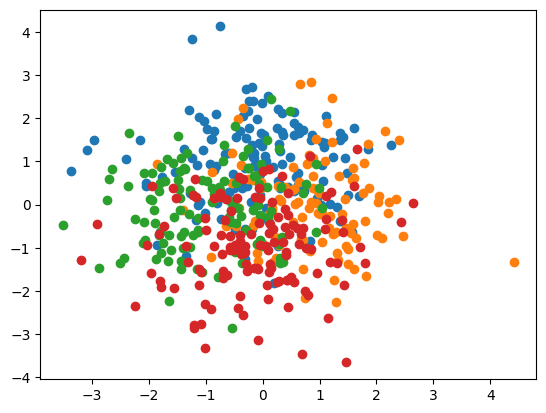

In [4]:
import matplotlib.pyplot as plt

# Define Gaussian Mixture parameters

# pi is the vector of mixing probabilities
# given in the question as π1 = π2 = π3 = π4 = 0.25
pi = [0.25, 0.25, 0.25, 0.25]

# mu is the matrix of means
# given in the question as μ1 =(0,1), μ2 =(1,0), μ3 =(−1,0), μ4 =(0,−1)
mu = [[0, 1], [1, 0], [-1, 0], [0, -1]]

# cov is the list of covariance matrices
# given in the question as Σ1 =Σ2 =Σ3 =Σ4 =I2 where Σk is the covariance matrix of the kth Gaussian
cov = [np.eye(2), np.eye(2), np.eye(2), np.eye(2)]

# Sample 500 points from mixture
samples = []
true_clusters = [[], [], [], []]
x_y_truth = []
for i in range(500):
    # Choose Gaussian
    k = np.random.choice(4, p=pi)
    # Sample from chosen Gaussian
    x = np.random.multivariate_normal(mu[k], cov[k])
    x_y_truth.append([x[0],x[1], k])
    # true label of the sample
    true_clusters[k].append(x)
    samples.append(x)

# Plot the samples
samples = np.array(samples)
# Plot the true_clusters
for i in range(4):
    plt.scatter(np.array(true_clusters[i])[:, 0], np.array(true_clusters[i])[:, 1])

#plt.scatter(samples[:, 0], samples[:, 1])
#plt.show()

### Q2.a - Implement the k-means algorithm from scratch.

In [5]:
class KMeans:
    def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        self.x_y = []
        for i in range(self.max_iter):
            self.clusters = [[] for _ in range(self.k)]
            for x in X:
                distances = [np.linalg.norm(x - c) for c in self.centroids]
                self.clusters[np.argmin(distances)].append(x)
                self.x_y.append([x[0],x[1], np.argmin(distances)])
            for j in range(self.k):
                self.centroids[j] = np.mean(self.clusters[j], axis=0)
    
    def predict(self, X):
        y_pred = []
        for x in X:
            distances = [np.linalg.norm(x - c) for c in self.centroids]
            y_pred.append(np.argmin(distances))
        return y_pred
    
    def getClusters(self):
        return self.clusters
    
    def getCentroids(self):
        return self.centroids
    
    def getX_Y(self):
        return self.x_y
    


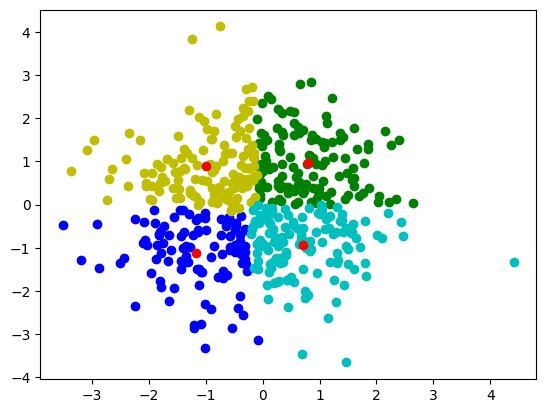

In [7]:
km = KMeans(4)
km.fit(samples)

clusters = km.getClusters()

plt.scatter(np.array(clusters[0])[:, 0], np.array(clusters[0])[:, 1], c='b')
plt.scatter(np.array(clusters[1])[:, 0], np.array(clusters[1])[:, 1], c='g')
plt.scatter(np.array(clusters[2])[:, 0], np.array(clusters[2])[:, 1], c='y')
plt.scatter(np.array(clusters[3])[:, 0], np.array(clusters[3])[:, 1], c='c')
plt.scatter(km.getCentroids()[:, 0], km.getCentroids()[:, 1], c='r')
plt.show()

#### Is the k-means able to correctly cluster the different components of the mixture?
The K-means algorithm failed to accurately cluster the different components of the mixture, as evident from the comparison of the two graphs above. The main reason behind this failure was the significant overlap between the clusters, which posed a challenge for K-means to distinguish and separate them correctly. Although the algorithm can also struggle with other factors such as varying cluster sizes and densities, this was not the case in our scenario, as our clusters were generated with identical sigma values, resulting in clusters of similar sizes and densities.

In [8]:
# means of Mixed Gaussian Model : μ1 =(0,1), μ2 =(1,0), μ3 =(−1,0), μ4 =(0,−1)
centroids = km.getCentroids()
print(centroids)

x_y_pred = km.getX_Y()

true_predicted = 0
for i in range(len(x_y_truth)):
    if x_y_truth[i][2] == x_y_pred[i][2]:
        true_predicted += 1
accuracy = true_predicted/len(x_y_truth)
print('Accuracy of KMeans: {}'.format(accuracy))


[[-1.16463553 -1.12167708]
 [ 0.80205733  0.96120804]
 [-1.00007992  0.88684025]
 [ 0.71047748 -0.93749422]]
Accuracy of KMeans: 0.266
